In [20]:
#Checking versions
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import numpy as np
import matplotlib.pyplot as plt

print("Tensor flow version: {}".format(tf.__version__))
print("Keras Version: {}".format(tensorflow.keras.__version__))
print()
print("Python {}".format(sys.version))
print("Pandas {}".format(pd.__version__))
print("Sciikit-Learn {}".format(sk.__version__))
print("GPU is ", "available" if tf.config.list_physical_devices('GPU') else "not available")

Tensor flow version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3
Sciikit-Learn 0.23.2
GPU is  available


In [21]:
mnist = tf.keras.datasets.mnist #image set of 28x28 images of hand-written digits 0-9
num_classif = 10
num_neurons = 512
model_name = "mnist_reader"

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tfk.models.Sequential()
model.add(tfk.layers.Flatten())
model.add(tfkl.Dense(num_neurons, activation = tf.nn.relu))
model.add(tfkl.Dense(num_neurons, activation = tf.nn.relu))
model.add(tfkl.Dense(num_classif, activation = tf.nn.softmax))

model.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 4)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)
model.save("{}.model".format(model_name))

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2004 - accuracy: 0.9388
Epoch 2/4
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0819 - accuracy: 0.9747
Epoch 3/4
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0539 - accuracy: 0.9822
Epoch 4/4
10000/10000 [==============================] - 1s 64us/sample - loss: 0.0785 - accuracy: 0.9771
0.07849704961068928 0.9771
INFO:tensorflow:Assets written to: mnist_reader.model\assets


In [22]:
new_model = tfk.models.load_model("{}.model".format(model_name))
predictions = new_model.predict(x_test)

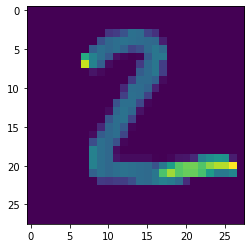

2


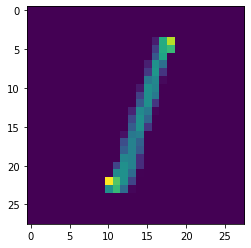

1


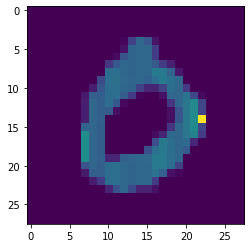

0


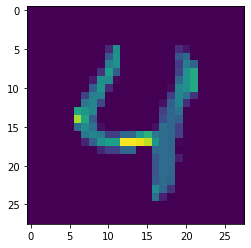

4


In [25]:
for x in range(1,5):#range(len(predictions)):
    plt.imshow(x_test[x])
    plt.show()
    print(np.argmax(predictions[x]))